## Importing Libraries

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

## Training Image Preprocessing

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 79104 files belonging to 38 classes.


### Validation Image Preprocessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 82.5   76.5   88.5 ]
   [ 95.    89.   101.  ]
   [ 83.    77.    89.  ]
   ...
   [ 93.5   85.5   96.5 ]
   [100.75  92.75 103.75]
   [ 84.5   76.5   87.5 ]]

  [[ 86.    80.    92.  ]
   [104.5   98.5  110.5 ]
   [ 91.5   85.5   97.5 ]
   ...
   [ 93.5   85.5   96.5 ]
   [ 99.25  91.25 102.25]
   [ 86.75  78.75  89.75]]

  [[ 79.75  73.75  85.75]
   [103.    97.   109.  ]
   [ 93.    87.    99.  ]
   ...
   [ 88.    80.    91.  ]
   [ 98.5   90.5  101.5 ]
   [ 90.5   82.5   93.5 ]]

  ...

  [[144.25 145.25 165.25]
   [149.   150.   170.  ]
   [145.5  146.5  166.5 ]
   ...
   [178.5  176.5  187.5 ]
   [178.5  176.5  187.5 ]
   [175.   173.   184.  ]]

  [[148.75 149.75 169.75]
   [146.25 147.25 167.25]
   [143.   144.   164.  ]
   ...
   [177.25 175.25 186.25]
   [179.25 177.25 188.25]
   [180.5  178.5  189.5 ]]

  [[152.75 153.75 173.75]
   [147.75 148.75 168.75]
   [148.25 149.25 169.25]
   ...
   [177.   175.   186.  ]
   [178.5  176.5  187.5 ]
   [177.25 175.25 18

## Building Model

In [15]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [16]:
model = Sequential()

In [ ]:
## Building Convolution Layer

In [17]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\karan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [22]:
model.add(Dropout(0.25))

In [23]:
model.add(Flatten())

In [24]:
model.add(Dense(units=1500,activation='relu'))

In [25]:
model.add(Dropout(0.4))

In [26]:
# Output layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [36]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 943s 377ms/step - accuracy: 0.4111 - loss: 2.0944 - val_accuracy: 0.8199 - val_loss: 0.5739
Epoch 2/10
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 771s 312ms/step - accuracy: 0.8517 - loss: 0.4701 - val_accuracy: 0.9019 - val_loss: 0.3083
Epoch 3/10
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 770s 312ms/step - accuracy: 0.9121 - loss: 0.2748 - val_accuracy: 0.9224 - val_loss: 0.2446
Epoch 4/10
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 773s 313ms/step - accuracy: 0.9421 - loss: 0.1793 - val_accuracy: 0.9434 - val_loss: 0.1749
Epoch 5/10
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 770s 312ms/step - accuracy: 0.9577 - loss: 0.1290 - val_accuracy: 0.9569 - val_loss: 0.1376
Epoch 6/10
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 777s 314ms/step - accuracy: 0.9649 - loss: 0.1060 - val_accuracy: 0.9427 - val_loss: 0.2113
Epoch 7/10
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 774s 313ms/step - accuracy: 0.9725 - loss: 0.0824 - val_accuracy: 0.9624 - val_loss: 0.1311
Epoch 8/10
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 1763s 714ms/step - a

## Model Evalution

In [37]:
#model Evalution on trainig set
train_loss,train_acc = model.evaluate(training_set)

2472/2472 ━━━━━━━━━━━━━━━━━━━━ 246s 99ms/step - accuracy: 0.9945 - loss: 0.0174


In [38]:
print(train_loss,train_acc)

0.015580183826386929 0.9951329827308655


In [39]:
#model Evalution on trainig set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 52s 95ms/step - accuracy: 0.9719 - loss: 0.0976


In [40]:
print(val_loss,val_acc)

0.09413725137710571 0.9727407097816467


## Saving Model

In [41]:
model.save("trained_model.keras")

In [42]:
training_history.history

{'accuracy': [0.617048442363739,
  0.873571515083313,
  0.9226588010787964,
  0.9462985396385193,
  0.9605329632759094,
  0.9678903818130493,
  0.9742490649223328,
  0.9788506031036377,
  0.981758177280426,
  0.9837555885314941],
 'loss': [1.2952394485473633,
  0.39999526739120483,
  0.24011097848415375,
  0.16560570895671844,
  0.12034573405981064,
  0.09799536317586899,
  0.07689265161752701,
  0.06568866968154907,
  0.05704730376601219,
  0.051169853657484055],
 'val_accuracy': [0.8198838829994202,
  0.9019463062286377,
  0.9223765134811401,
  0.9434327483177185,
  0.9569200873374939,
  0.9426929354667664,
  0.9623833298683167,
  0.9498634338378906,
  0.9659116864204407,
  0.9727407097816467],
 'val_loss': [0.5739388465881348,
  0.3083336651325226,
  0.2446320503950119,
  0.17489127814769745,
  0.1376352310180664,
  0.21132399141788483,
  0.13108183443546295,
  0.1650642305612564,
  0.11126354336738586,
  0.09413732588291168]}

In [43]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [44]:
training_history.history['val_accuracy']

[0.8198838829994202,
 0.9019463062286377,
 0.9223765134811401,
 0.9434327483177185,
 0.9569200873374939,
 0.9426929354667664,
 0.9623833298683167,
 0.9498634338378906,
 0.9659116864204407,
 0.9727407097816467]

## Accuracy Visualization

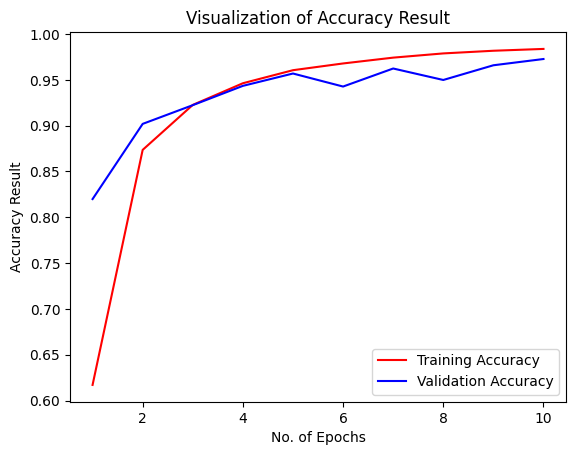

In [45]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [46]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [47]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [48]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 51s 93ms/step


(array([[9.99999642e-01, 6.55399202e-09, 2.91889041e-10, ...,
         5.67817091e-15, 9.14917081e-14, 9.56401625e-13],
        [1.00000000e+00, 2.23547553e-13, 4.36033181e-14, ...,
         2.57741239e-21, 1.24523650e-16, 2.46369872e-17],
        [1.00000000e+00, 4.89617993e-15, 1.23117179e-14, ...,
         7.40567156e-24, 1.31198781e-19, 4.20386257e-17],
        ...,
        [8.34213698e-10, 1.95875793e-14, 4.90142771e-09, ...,
         4.21385106e-12, 5.47421136e-12, 9.99998093e-01],
        [2.35415731e-09, 4.99777603e-15, 2.60731464e-10, ...,
         9.35120644e-12, 1.08904953e-12, 9.99999523e-01],
        [2.42351762e-14, 3.98526037e-15, 3.02495422e-14, ...,
         1.10159527e-16, 2.05520390e-15, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [49]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [50]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [51]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [52]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

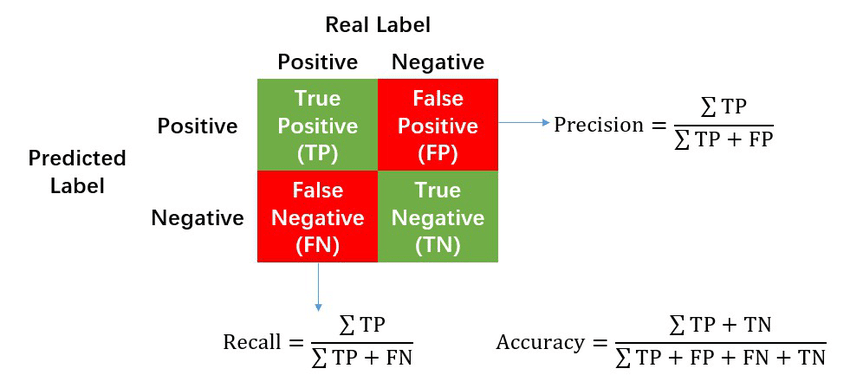

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.98      0.98       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.99      0.98       440
                                   Apple___healthy       0.98      0.98      0.98       502
                               Blueberry___healthy       0.98      0.99      0.99       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.96      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.95      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.92      0.

In [59]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

## Confusion Matrix Visualization

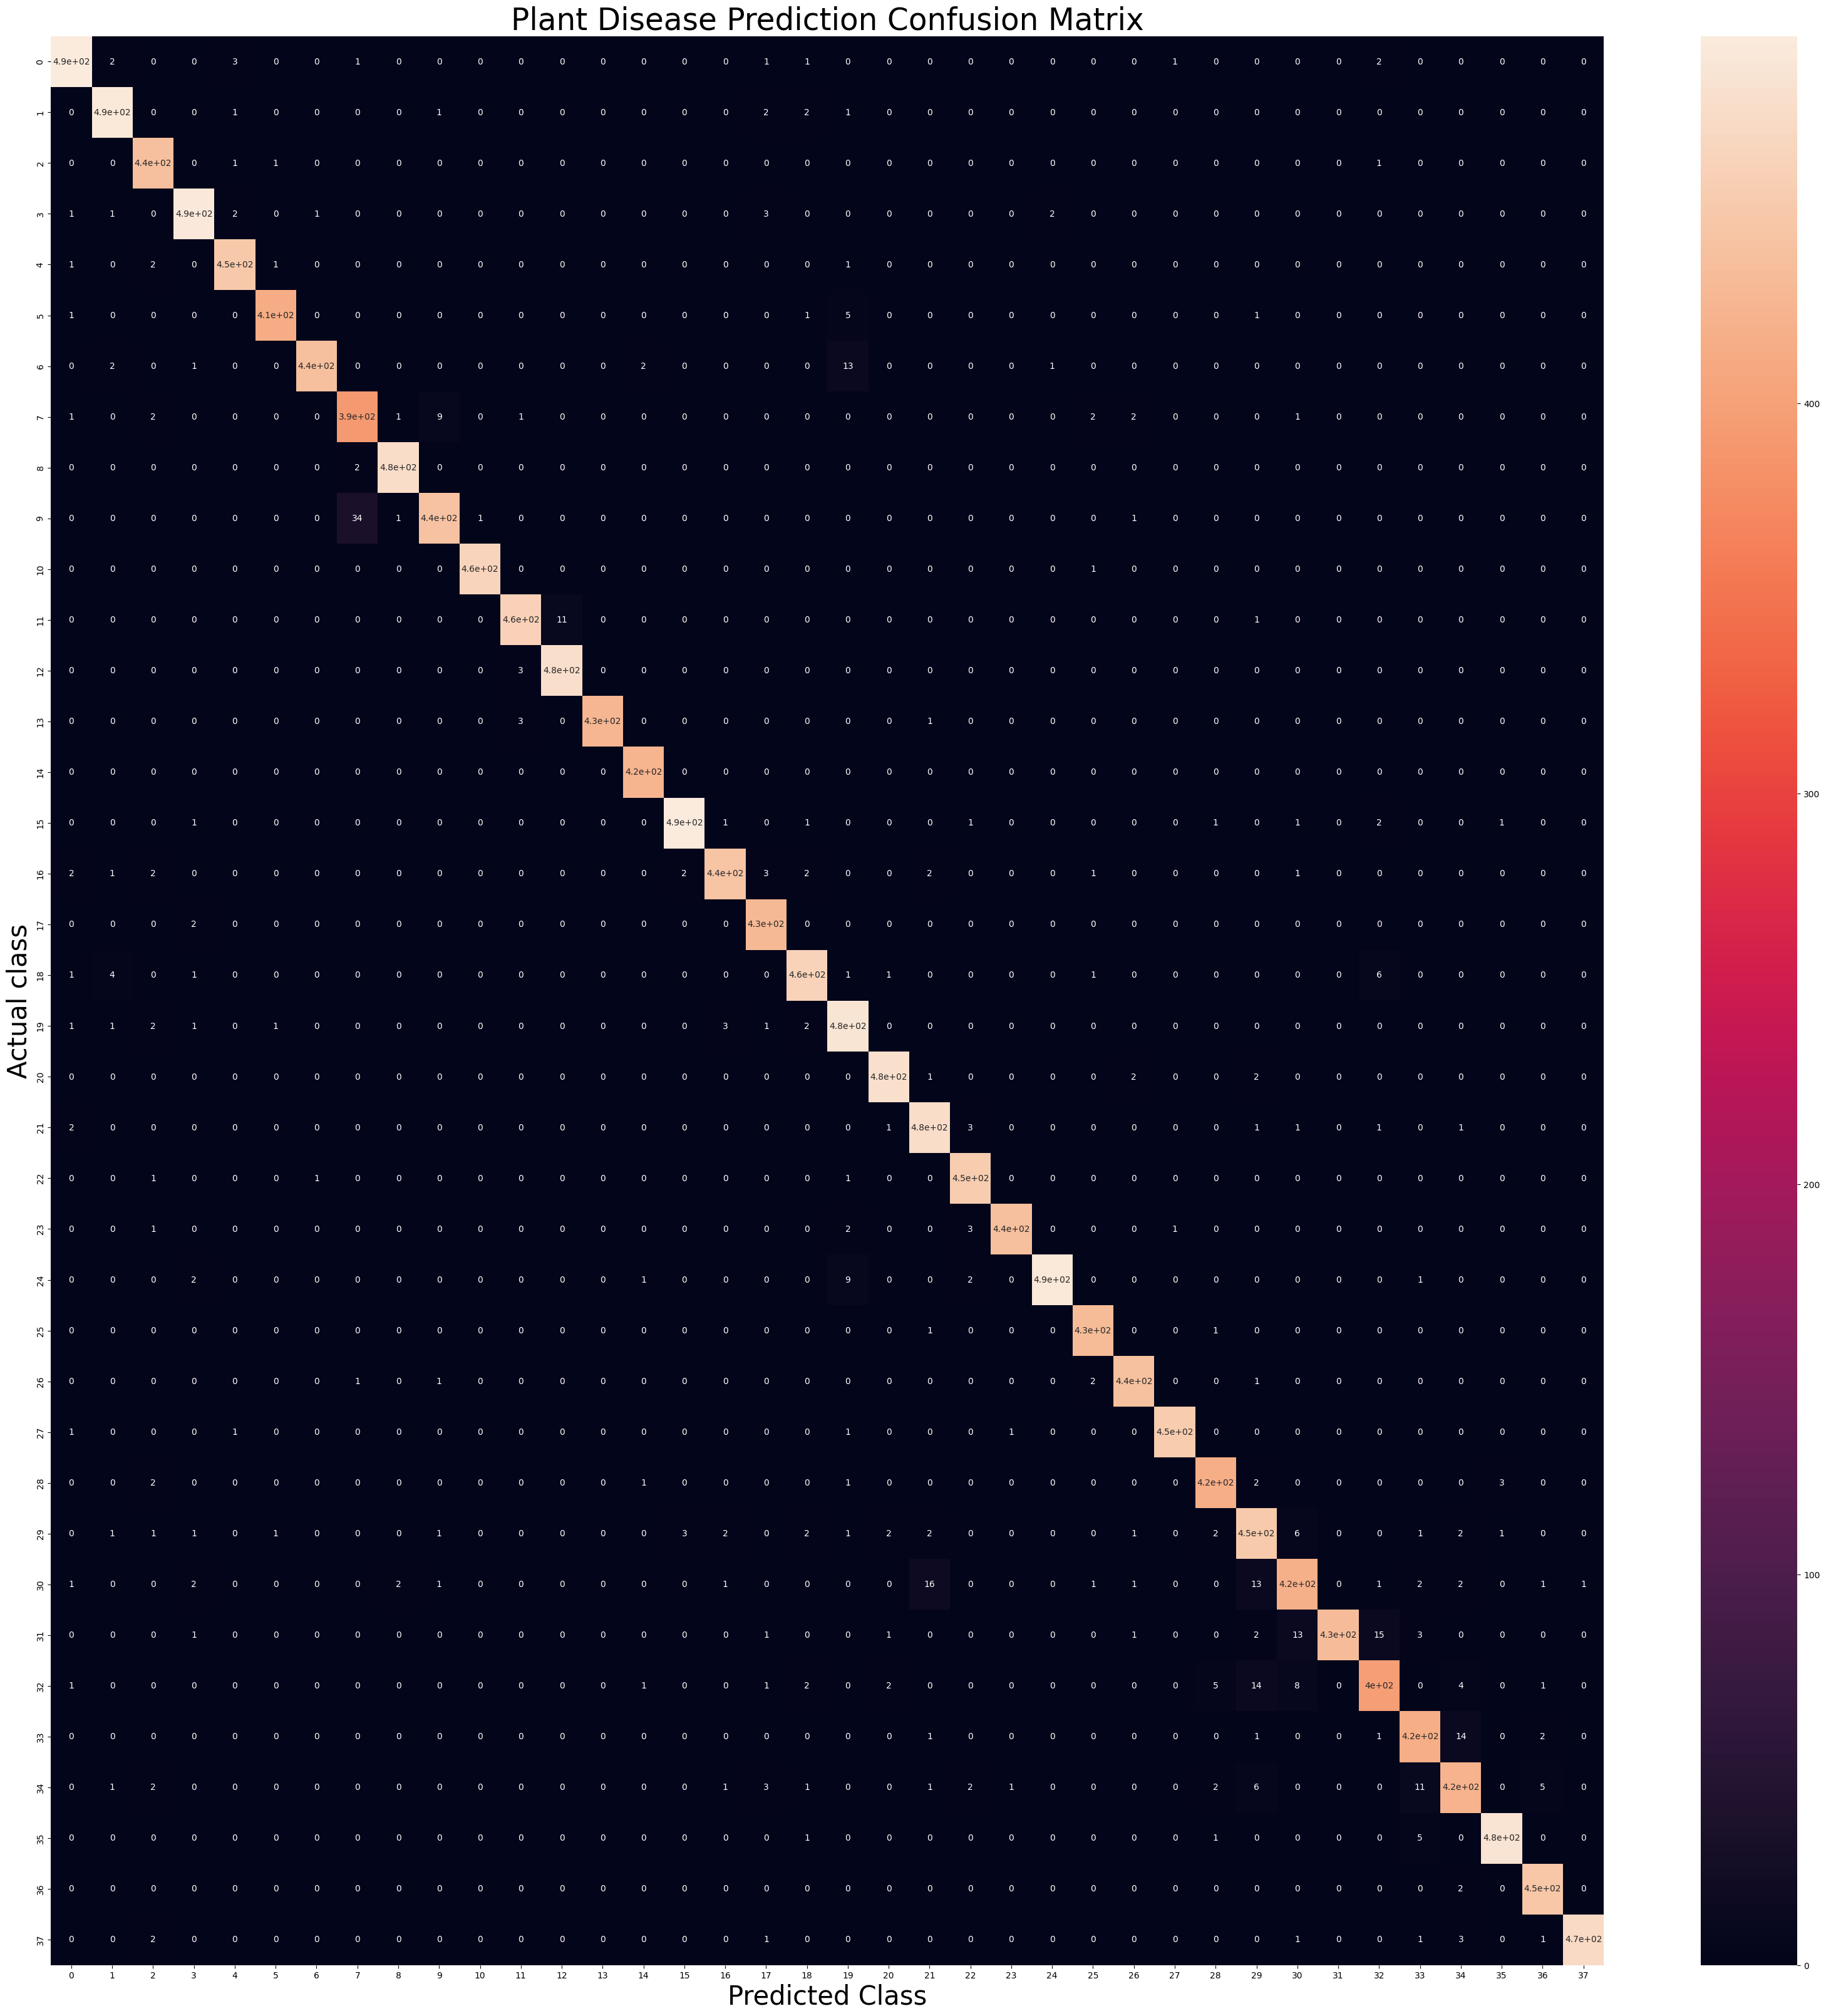

In [60]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=30)
plt.ylabel("Actual class",fontsize=30)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=35)
plt.show()